In [1]:
import pandas
import seaborn
import numpy
import matplotlib.pyplot as plt

# Scalability benchmark results

The SCIP tool ([commit](https://github.com/ScalableImagingPipeline/dask-pipeline/commit/db5adcd96ad4128e2dbba793676a0bc45ab00b18)) was ran on the Prism cluster on a Vulcan PBMC dataset of 1000 4-channel images. The amount of Dask worker processes was varied from 2 to 16, doubling the number of processes each time. Each measurement was repeated 3 times. Only one cluster node was used, which has 250GB of memory and 24 cores.

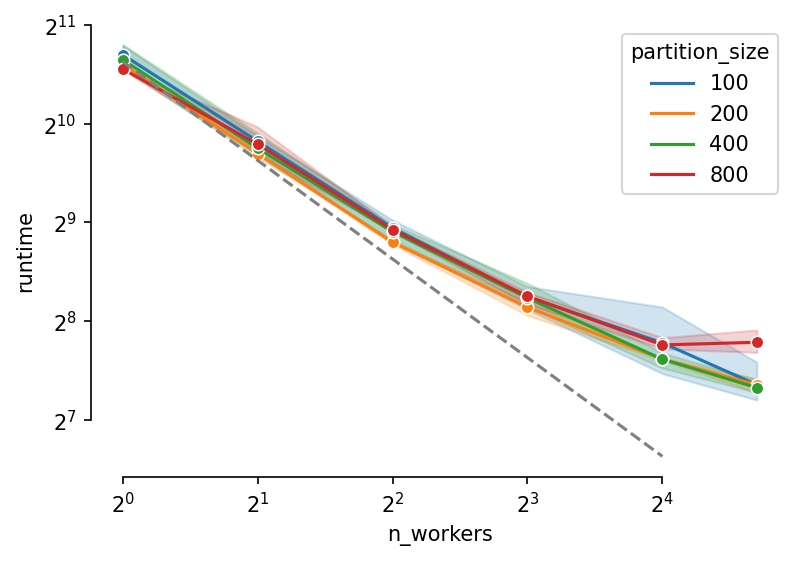

In [5]:
df = pandas.read_csv("../benchmark_results/benchmark_20210930224331.csv")
df["n_workers"] = df["n_workers"].astype("category")
df["partition_size"] = df["partition_size"].astype("category")

fig, ax = plt.subplots(dpi=150)
seaborn.lineplot(ax=ax, data=df, x="n_workers", y="runtime", hue="partition_size", marker="o")

baseline = df[df["n_workers"] == 1]["runtime"].mean()
ax.plot((1, 16), (baseline, baseline/16), linestyle="--", color="grey")
ax.set_xscale("log", basex=2)
ax.set_yscale("log", basey=2)
seaborn.despine(ax=ax, trim=True)

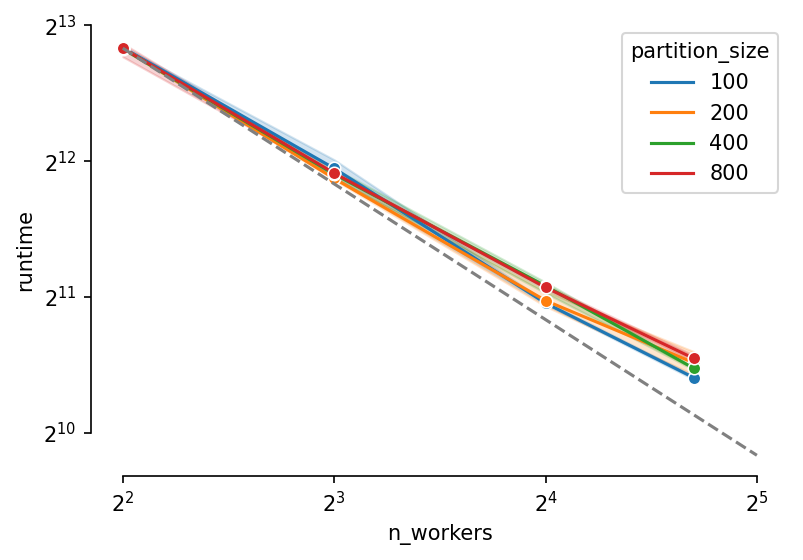

In [11]:
df = pandas.read_csv("../benchmark_results/benchmark_20211006164152.csv")
df["n_workers"] = df["n_workers"].astype("category")
df["partition_size"] = df["partition_size"].astype("category")

fig, ax = plt.subplots(dpi=150)
seaborn.lineplot(ax=ax, data=df, x="n_workers", y="runtime", hue="partition_size", marker="o")

baseline = df[df["n_workers"] == 4]["runtime"].mean()
ax.plot((4, 32), (baseline, baseline/8), linestyle="--", color="grey")
ax.set_xscale("log", basex=2)
ax.set_yscale("log", basey=2)
seaborn.despine(ax=ax, trim=True)